## **Importing Libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading Dataset**

In [22]:
players = pd.read_csv('/content/male_players.csv')

## **Checking null columns**

In [23]:
players.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Rank,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0


## **Deleting columns that have null values**

In [24]:
players = players.drop(['Alternative positions', 'play style', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis = 1)

## **Finding the top 20 teams by Average Overall Rating**

<ipython-input-25-71cee8ec7224>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='OVR', y='Team', data = best_team, palette = "rocket")


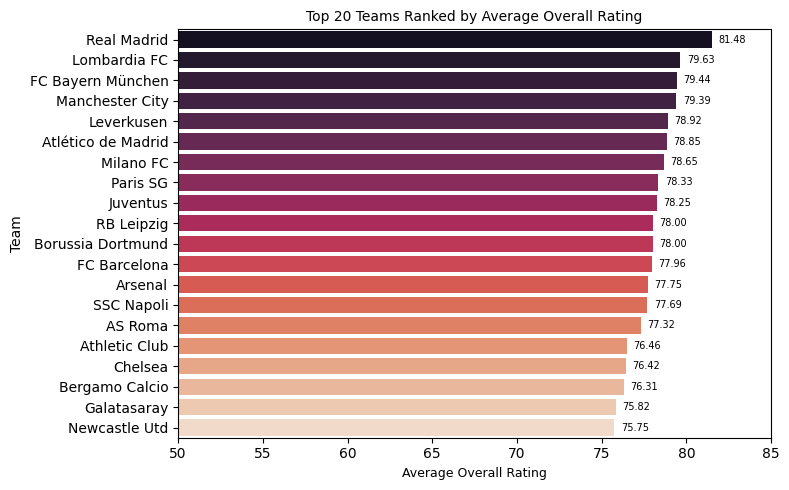

In [25]:
# Group by team and calculating average overall rating
best_team = players.groupby(['Team'])['OVR'].mean().sort_values(ascending=False).reset_index().head(20)

# Plotting the teams by the average overall rating
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='OVR', y='Team', data = best_team, palette = "rocket")

# Adding title and labels
plt.title('Top 20 Teams Ranked by Average Overall Rating', fontsize = 10)
plt.xlabel('Average Overall Rating', fontsize = 9)
plt.xlim([50,85])
plt.ylabel('Team', fontsize = 10)

# Assigning values to each of the bars
for index, (team, ovr) in enumerate(zip(best_team['Team'], best_team['OVR'])):
    plt.text(ovr + 1.2, index, f'{ovr:.2f}', va='center', ha='center', fontsize = 7)

plt.tight_layout()
plt.show()

## **Finding top 20 fastest teams**

<ipython-input-26-4d5d76d8af12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='PAC', y='Team', data = fastest_team, palette = "flare")


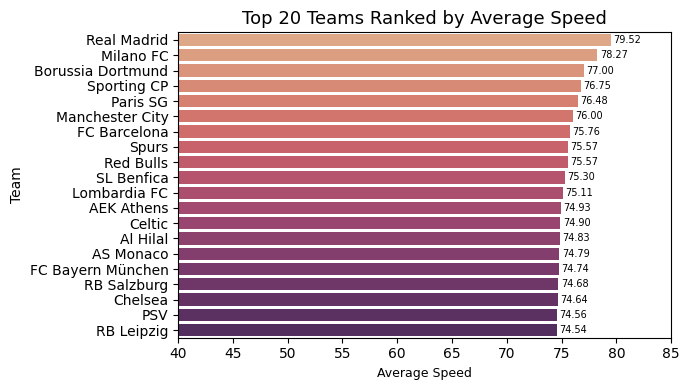

In [26]:
# Group by team and calculating average speed
fastest_team = players.groupby(['Team'])['PAC'].mean().sort_values(ascending=False).reset_index().head(20)

# Plotting the teams by the average speed
plt.figure(figsize=(7, 4))
bar_plot = sns.barplot(x='PAC', y='Team', data = fastest_team, palette = "flare")

# Adding title and labels
plt.title('Top 20 Teams Ranked by Average Speed', fontsize = 13)
plt.xlabel('Average Speed', fontsize = 9)
plt.xlim([40,85])
plt.ylabel('Team', fontsize = 10)

# Assigning values to each of the bars
for index, (team, pac) in enumerate(zip(fastest_team['Team'], fastest_team['PAC'])):
    plt.text(pac + 1.5, index, f'{pac:.2f}', va='center', ha='center', fontsize = 7)

plt.tight_layout()
plt.show()

## **Finding average speed of different playing positions**

<ipython-input-27-7a94e0b169b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='PAC', y = 'Position', data = fastest_position, palette = "rocket_r")


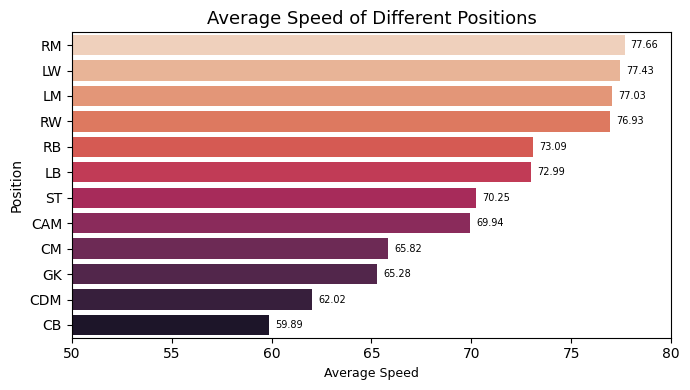

In [27]:
# Group by playing position and calculating average speed
fastest_position = players.groupby(['Position'])['PAC'].mean().sort_values(ascending=False).reset_index().head(20)

# Plotting the positions by the average speed
plt.figure(figsize=(7, 4))
bar_plot = sns.barplot(x='PAC', y = 'Position', data = fastest_position, palette = "rocket_r")

# Adding title and labels
plt.title('Average Speed of Different Positions', fontsize = 13)
plt.xlabel('Average Speed', fontsize = 9)
plt.xlim([50,80])
plt.ylabel('Position', fontsize = 10)

# Assigning values to each of the bars
for index, (team, pac) in enumerate(zip(fastest_position['Position'], fastest_position['PAC'])):
    plt.text(pac + 1, index, f'{pac:.2f}', va='center', ha='center', fontsize = 7)

plt.tight_layout()
plt.show()

## **Determining Key Attributes for Various Football Positions**

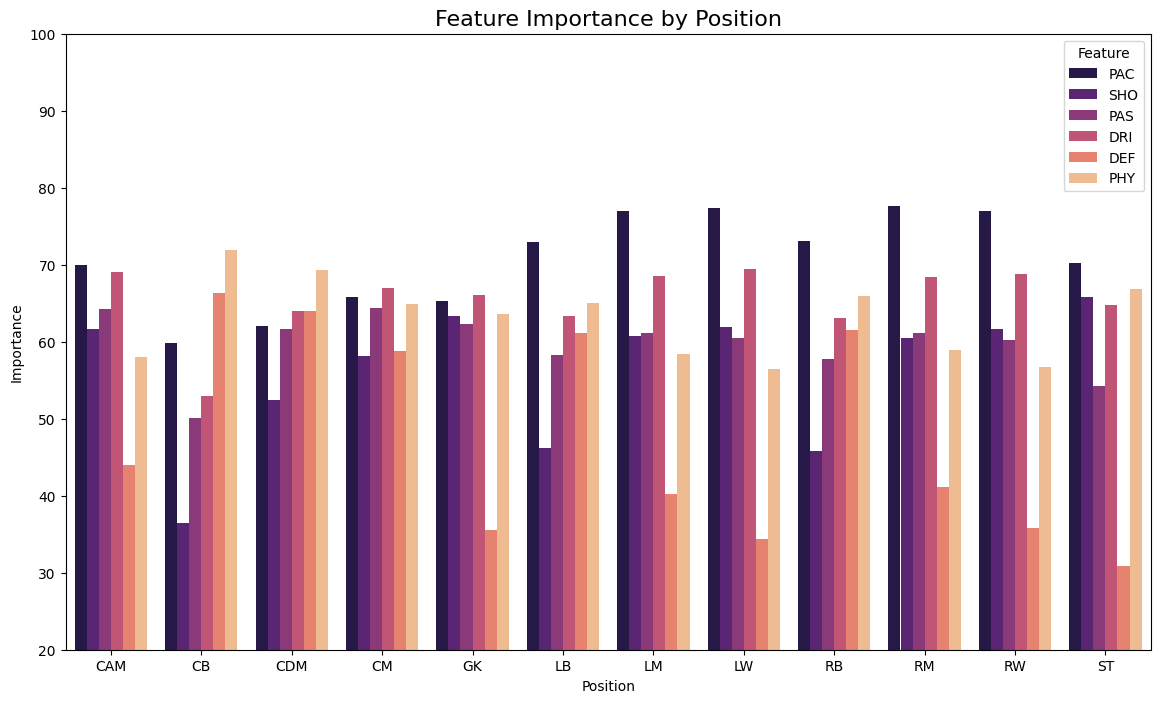

In [28]:
# Defining the key attributes and position
attributes = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Position']

# Creating a new dataframe with the key attributes and positions
selected_features = players[attributes]

# Group by position and calculate the mean for each attribute
position_attributes = selected_features.groupby('Position').mean().reset_index()

# Reshaping the dataframe
selected_features_melted =position_attributes.melt(id_vars='Position', var_name='Feature', value_name='Importance')

# Plotting the importance of key attributes by position
plt.figure(figsize=(14, 8))
sns.barplot(x='Position', y='Importance', hue='Feature', data = selected_features_melted, palette='magma')

# Adding title and labels
plt.title("Feature Importance by Position", fontsize=16)
plt.xlabel("Position")
plt.ylabel("Importance")
plt.ylim(20, 100)
plt.show()
